<a href="https://colab.research.google.com/github/DivyaWadehra/AI-LAB/blob/master/RainFallPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To predict rainfall over the region 

In [ ]:
# Download the dataset from "https://www.kaggle.com/grubenm/austin-weather" named 'autin_weather.csv'


In [18]:
#Import relevant libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
#read data using pandas into a dataframe
data=pd.read_csv("austin_weather.csv")
print(data.head())
print(data.columns)
print(data.describe)

         Date  TempHighF  ...  PrecipitationSumInches               Events
0  2013-12-21         74  ...                    0.46  Rain , Thunderstorm
1  2013-12-22         56  ...                       0                     
2  2013-12-23         58  ...                       0                     
3  2013-12-24         61  ...                       0                     
4  2013-12-25         58  ...                       T                     

[5 rows x 21 columns]
Index(['Date', 'TempHighF', 'TempAvgF', 'TempLowF', 'DewPointHighF',
       'DewPointAvgF', 'DewPointLowF', 'HumidityHighPercent',
       'HumidityAvgPercent', 'HumidityLowPercent',
       'SeaLevelPressureHighInches', 'SeaLevelPressureAvgInches',
       'SeaLevelPressureLowInches', 'VisibilityHighMiles',
       'VisibilityAvgMiles', 'VisibilityLowMiles', 'WindHighMPH', 'WindAvgMPH',
       'WindGustMPH', 'PrecipitationSumInches', 'Events'],
      dtype='object')
<bound method NDFrame.describe of             Date  TempHig

In [9]:
#Data cols for the first row
all_cols=list(data.columns)
for i in range(0,len(all_cols)):
  print(all_cols[i], data[all_cols[i]].iloc[0])

Date 2013-12-21
TempHighF 74
TempAvgF 60
TempLowF 45
DewPointHighF 67
DewPointAvgF 49
DewPointLowF 43
HumidityHighPercent 93
HumidityAvgPercent 75
HumidityLowPercent 57
SeaLevelPressureHighInches 29.86
SeaLevelPressureAvgInches 29.68
SeaLevelPressureLowInches 29.59
VisibilityHighMiles 10
VisibilityAvgMiles 7
VisibilityLowMiles 2
WindHighMPH 20
WindAvgMPH 4
WindGustMPH 31
PrecipitationSumInches 0.46
Events Rain , Thunderstorm


In [11]:
#drop unnecessary cols and replace the string with value
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 
                  'SeaLevelPressureLowInches'], axis = 1)
data = data.replace('T', 0.0)

In [16]:
print(data.describe)

<bound method NDFrame.describe of       TempHighF  TempAvgF  ...  WindGustMPH PrecipitationSumInches
0            74        60  ...           31                   0.46
1            56        48  ...           25                      0
2            58        45  ...           12                      0
3            61        46  ...           20                      0
4            58        50  ...           16                      0
...         ...       ...  ...          ...                    ...
1314        103        89  ...           21                      0
1315        105        91  ...           20                      0
1316        107        92  ...           17                      0
1317        106        93  ...           20                      0
1318         99        88  ...           20                      0

[1319 rows x 17 columns]>


In [17]:
data = data.replace('-', 0.0)
data.to_csv('austin_final.csv')

In [24]:
data=pd.read_csv('austin_final.csv')
#precipation sum Inches will serve as the output to predict ,rest all will be features
X=data.drop(['PrecipitationSumInches'],axis=1)
Y=data['PrecipitationSumInches']

In [25]:
print(Y[0])
#reshape Y to 2-d array
Y=Y.values.reshape(-1,1)
print(Y[0])


0.46
[0.46]


In [26]:
print(Y.size)

1319


In [27]:
day_index=798
days=[i for i in range(Y.size)]
print(days)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [28]:
#initialize a linear regression classifier
clf=LinearRegression()
#train the classifier with our input data
clf.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
#Give a sample input to test our model , it's a 2d array
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = inp.reshape(1, -1)
print(inp)

[[74.   60.   45.   67.   49.   43.   33.   45.   57.   29.68 10.    7.
   2.    0.   20.    4.   31.  ]]


In [30]:
# print the output.
print('The precipitation in inches for the input is:', clf.predict(inp))

The precipitation in inches for the input is: [[1.33868402]]


the precipitation trend graph: 


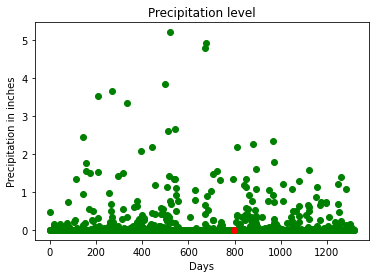

In [31]:
print("the precipitation trend graph: ")
plt.scatter(days, Y, color = 'g')
plt.scatter(days[day_index], Y[day_index], color ='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")
  
  
plt.show()